In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importing of some important liberaries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express  as px 
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import classification_report

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score

##Uploading the datasets

In [142]:
df1=pd.read_csv('/content/drive/MyDrive/Reunion/newdata.csv')

In [143]:
df1

,Months_loan_taken_for,Principal_loan_amount,Primary_applicant_age_in_years,Purpose,Loan_history,Years_at_current_residence,Property,Employment_status,Has_been_employed_for_at_most,high_risk_applicant
0,0.140281,0.371186,0.917850,0.625,0.25,1.000000,1.0,0.333333,1.00,0.0
1,0.859719,0.762820,0.106772,0.625,0.75,0.333333,1.0,0.333333,0.50,1.0
2,0.380094,0.511697,0.689984,0.500,0.25,0.666667,1.0,1.000000,0.75,0.0
3,0.813520,0.830448,0.627963,0.000,0.75,1.000000,0.0,0.333333,0.75,0.0
4,0.619906,0.714579,0.747135,0.750,0.50,1.000000,0.0,0.333333,0.50,1.0
...,...,...,...,...,...,...,...,...,...,...
983,0.380094,0.466347,0.356541,0.000,0.75,1.000000,1.0,1.000000,0.75,0.0
984,0.697109,0.658458,0.542181,1.000,0.75,1.000000,0.0,0.000000,0.50,0.0
985,0.380094,0.281111,0.504823,0.625,0.75,1.000000,0.5,0.333333,1.00,0.0
986,0.837390,0.481002,0.139147,0.625,0.75,1.000000,0.0,0.333333,0.50,1.0


Checking if the data is imbalanced

In [111]:
X =df1.drop('high_risk_applicant',axis=1)
y = df1['high_risk_applicant']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


0.0    70.1417
1.0    29.8583
Name: high_risk_applicant, dtype: float64


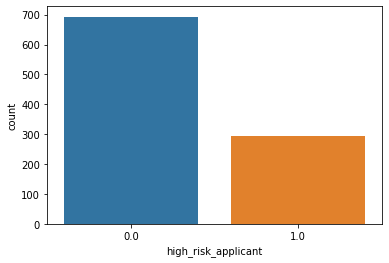

In [113]:
print((df1['high_risk_applicant'].value_counts()/df1['high_risk_applicant'].shape)*100)
sns.countplot(df1['high_risk_applicant'])
plt.show()

Yes, our data is imbalanced. Now my next task is to balanced the data.
For balancing the dataset , I will use SMOTE technique.

In [114]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE

In [115]:
smote = SMOTE(sampling_strategy='minority')
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

0.0    70.1417
1.0    29.8583
Name: high_risk_applicant, dtype: float64


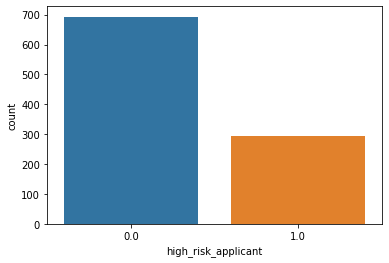

In [116]:
print((df1['high_risk_applicant'].value_counts()/df1['high_risk_applicant'].shape)*100)
sns.countplot(df1['high_risk_applicant'])
plt.show()

In [117]:
df1.shape

(988, 10)

In [118]:
print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
smote = SMOTE(sampling_strategy='minority')
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print('After OverSampling, the shape of train_X: {}'.format(X_train_sm.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_sm.shape))

Before OverSampling, the shape of train_X: (691, 9)
Before OverSampling, the shape of train_y: (691,) 

After OverSampling, the shape of train_X: (956, 9)
After OverSampling, the shape of train_y: (956,) 



In [119]:
X_train_sm.shape

(956, 9)

In [120]:
y_train_sm.shape

(956,)

In [121]:
columns = list(df1.columns)

In [122]:
columns

['Months_loan_taken_for',
 'Principal_loan_amount',
 'Primary_applicant_age_in_years',
 'Purpose',
 'Loan_history',
 'Years_at_current_residence',
 'Property',
 'Employment_status',
 'Has_been_employed_for_at_most',
 'high_risk_applicant']

In [123]:
columns.pop()

'high_risk_applicant'

In [124]:
balance_df = pd.DataFrame(X_train_sm, columns=columns)

In [125]:
balance_df['high_risk_applicant'] = y_train_sm

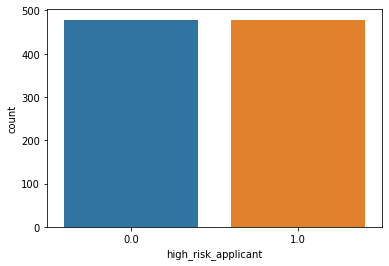

In [126]:
sns.countplot('high_risk_applicant', data = balance_df)

Now, my dataset is balanced.

##**Modelling**

**1. Logistic Regression**

In [127]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

In [128]:
#separating dataset into X and y
y= df1.high_risk_applicant
X = df1.drop(['high_risk_applicant'] , axis = 1)

In [129]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [130]:
logistic = LogisticRegression(random_state = 42)
logistic.fit(X_train_sm, y_train_sm)
y_pred = logistic.predict(X_test)
acc_1=accuracy_score(y_test, y_pred)
accuracy1=round(acc_1*100,2)
cm = confusion_matrix(y_test, y_pred)
 
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[177 101]
 [ 43  75]]


In [131]:
print(classification_report(y_test,y_pred))
print('The accuracy score of logistic regression is {}%'.format(accuracy1))

              precision    recall  f1-score   support

         0.0       0.80      0.64      0.71       278
         1.0       0.43      0.64      0.51       118

    accuracy                           0.64       396
   macro avg       0.62      0.64      0.61       396
weighted avg       0.69      0.64      0.65       396

The accuracy score of logistic regression is 63.64%


**2. K Nearest Neighbors**

In [132]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbors = KNeighborsClassifier()
k_neighbors.fit(X_train_sm,y_train_sm)
y_pred2 = k_neighbors.predict(X_test)
acc_2 = accuracy_score(y_test, y_pred2)
accuracy2=round(acc_2*100,2)
print(classification_report(y_test,y_pred))
print('The accuracy score of k nearest neighbors is {}%'.format(accuracy2))

              precision    recall  f1-score   support

         0.0       0.80      0.64      0.71       278
         1.0       0.43      0.64      0.51       118

    accuracy                           0.64       396
   macro avg       0.62      0.64      0.61       396
weighted avg       0.69      0.64      0.65       396

The accuracy score of k nearest neighbors is 72.22%


In [133]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state = 42)
random_forest.fit(X_train_sm, y_train_sm)

ran = random_forest.predict(X_train)

y_pred5 = random_forest.predict(X_test)
acc_5 = accuracy_score(y_test, y_pred5)
score5 = round(acc_5*100,2)
print(classification_report(y_test,y_pred))
print('The accuracy score of random forest is {}%'.format(score5))

              precision    recall  f1-score   support

         0.0       0.80      0.64      0.71       278
         1.0       0.43      0.64      0.51       118

    accuracy                           0.64       396
   macro avg       0.62      0.64      0.61       396
weighted avg       0.69      0.64      0.65       396

The accuracy score of random forest is 89.9%


#Hyperparameter tunning:

In [134]:
from scipy.stats import randint as sp_randint

In [135]:
rfc = RandomForestClassifier(random_state=1)

params = {'n_estimators': sp_randint(5,30),
          'criterion' : ['gini','entropy'],
          'max_depth' : sp_randint(2,10),
          'min_samples_split' : sp_randint(2,20),
          'min_samples_leaf' : sp_randint(1,20),
          'max_features' : sp_randint(2,18)}

rand_search_rfc = RandomizedSearchCV(rfc, param_distributions=params, random_state=1, cv=3)

rand_search_rfc.fit(X_train_sm,y_train_sm)

rand_search_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 9,
 'min_samples_leaf': 10,
 'min_samples_split': 19,
 'n_estimators': 28}

**3. Random Forest**

In [136]:
rfc = RandomForestClassifier(**rand_search_rfc.best_params_, random_state=1)

acc=rfc.fit(X_train_sm, y_train_sm)

y_pred = rfc.predict(X_test)
acc_6 = accuracy_score(y_test, y_pred)
score6 = round(acc_6*100,2)
print(classification_report(y_test,y_pred))
print('The accuracy score of random forest is {}%'.format(score6))

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84       278
         1.0       0.62      0.57      0.59       118

    accuracy                           0.77       396
   macro avg       0.72      0.71      0.72       396
weighted avg       0.76      0.77      0.76       396

The accuracy score of random forest is 76.77%


**4. Decision Tree Classifier**

In [137]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_sm,y_train_sm)
y_pred4 = decision_tree.predict(X_test)
acc_4 = accuracy_score(y_test, y_pred4)
score4 = round(acc_4*100,2)
print(classification_report(y_test,y_pred))

print('The accuracy score of Decision tree is {}%'.format(score4))

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84       278
         1.0       0.62      0.57      0.59       118

    accuracy                           0.77       396
   macro avg       0.72      0.71      0.72       396
weighted avg       0.76      0.77      0.76       396

The accuracy score of Decision tree is 88.13%


##**TASK 2**

**Q1. Explain your intuition behind the features used for modeling.**

Answer: I have used feature selction, after taht I selsect top 10 features among them because these were the features that impact my accuracy.

**Q2. Are you creating new derived features? If yes explain the intuition behind them.**

Answer: No, I have not derived any feature.

**Q3. Are there missing values? If yes how you plan to handle it.**

Answer:
Yes There were many missing values in few of the columns and in order to handle them I filled the missing values with appropriate values, such as ‘NaN’ will be replaced with 0 and many such.

**Q4. How categorical features are handled for modeling.**

Answer: By using label Encoding, I handled the categorical features.

**Q5. Describe the features correlation using correlation matrix. Tell us about few correlated feature & share your understanding on why they are correlated.**

Answer:
There are quite a few features that are correlated with each other like the ‘Years_at_current_residence’ is highly correlated with ‘Primary_applicant_age_in_years’, this two features tells us that the age of applicant might play a crucial role in understanding how many years an applicant might stay there, applicants of young age might like to change residence after every few years, whereas the elder aged applicants might stay at same residence for a long time. Other features like ‘Principla_loan_amount’ and ‘Months_loan_taken_for’ are also highly correlated, these two features can easily tell us that if the amount of loan is greater then the time duration for which the loan amount was taken for will also be greater.

**Q6.Do you plan to drop the correlated feature? If yes then how.**

Answer: 
No, I have not dropped correlated features. By heatmap I find the correlated features and there were no features which are too much correlated.

**Q7.Which ML algorithm you plan to use for modeling.**

Answer: Logistic Regression, KNN, Random forest classifier and Decision tree clssifier I have used for modelling.

**Q8. Which metric(s) you will choose to select between the set of models.**

Answer:

-Metrics like Confusion Matrix, F1 score, Recall, Precision and ROC_score are prime essentials for the models that I’ve trained. The F1 score is defined as the harmonic mean of precision and recall.

**Q9. Train two (at least) ML models to predict the credit risk & provide the confusion matrix for each model.**

Answer: Confusion Matrix for Logistic regression: 

 [[177  101]

 [ 43   75]]



**Q10. How will you select the hyperparameters for the models trained in above step.**
Answer:
-To select the hyperparameters we first Split the data at hand into training and test subsets by comparing all the metric values I’ve chosen the hyperparameter set that yields the best metric value
 
 **Q11. Explain how you will export the trained models and deploy it for prediction in production.**

Answer:
Exporting Pickle is the standard way of serializing objects in Python. You can use the pickle operation to serialize your machine learning algorithms and save the serialized format to a file. Later you can load this file to deserialize your model and use it to make new predictions.

Joblib is an alternative tool to pickle that we can use to save [and load] our models. It’s part of SciPy’s ecosystem and is much more efficient on objects that carry large NumPy arrays

**Steps for Exporting**

Save the trained model as a pickle string.
Load the pickled model.
Use the loaded pickled model to make predictions.
-Method 1: Deploying Machine Learning model as web service. The simplest way to deploy a machine learning model is to create a web service for prediction. We can use the Flask web framework to wrap a random forest classifier built with scikit-learn. Scikit-learn offers python specific serialization that makes model persistence and restoration effortless. we can serve the persisted model using a web framework.

**Method 2**: Deploying Machine Learning model as batch prediction. While online models can serve prediction, on-demand batch predictions are sometimes preferable. Offline models can be optimized to handle a high volume of job instances and run more complex models. In batch production mode, you don't need to worry about scaling or managing servers either. To do so we first train the model on a high-performance computing system with an appropriate batch-processing framework. After all the stages have been executed, we can predict unseen data with the resulting model by iterating sequentially over the partitions.

 

